## Combining and exploring Datasets

**Importing the required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing our databases**

In [3]:
df1 = pd.read_csv('video_games.csv')
df2 = pd.read_csv('vgsales.csv')

**Merging our datasets as one big dataset**

In [4]:
# Merge based on the 'Name' attribute
df = pd.merge(df1, df2, left_on='Title', right_on='Name', how='inner')

# Drop the duplicate column 'name' as it was used for merging
df.drop('Name', axis=1, inplace=True)

df

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,1847,PSP,2004.0,Puzzle,Ubisoft,0.52,0.35,0.00,0.23,1.11
1,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,688,DS,2004.0,Puzzle,Nintendo,0.52,0.45,1.21,0.13,2.31
2,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,868,PSP,2004.0,Sports,Sony Computer Entertainment,0.50,0.50,0.63,0.33,1.96
3,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,391,PS2,2004.0,Action,Activision,1.75,1.20,0.02,0.43,3.41
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,1832,XB,2004.0,Action,Activision,0.82,0.26,0.00,0.04,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,Secret Files: Tunguska,True,2,True,True,Adventure,True,NaN,True,64,...,12097,Wii,2008.0,Adventure,Koch Media,0.05,0.02,0.00,0.01,0.07
2712,Secret Files: Tunguska,True,2,True,True,Adventure,True,NaN,True,64,...,13055,DS,2008.0,Adventure,Deep Silver,0.04,0.01,0.00,0.00,0.05
2713,Secret Files: Tunguska,True,2,True,True,Adventure,True,NaN,True,64,...,13444,PC,2006.0,Adventure,DreamCatcher Interactive,0.00,0.04,0.00,0.01,0.05
2714,Fading Shadows,True,1,True,True,"Action,Adventure",True,NaN,True,62,...,13998,PSP,2008.0,Puzzle,Ivolgamus,0.03,0.00,0.00,0.00,0.04


## Analysis Examples

**Seeing how many games we have in each genre per year**

As we're lacking data before 1990 and after 2015, we'll focus our study between these years

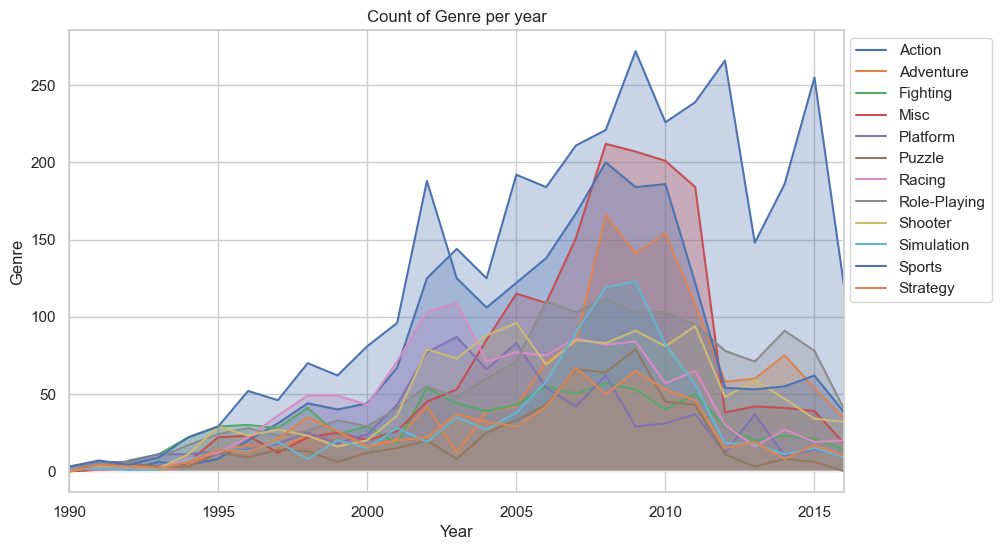

In [5]:
# Set the style of the plot as "grid" not to have it all blank
sns.set(style="whitegrid")

# Filter the DataFrame for specified genres
#selected_genres = ['Sports', 'Strategy', 'Role-Playing', 'Simulation']
#filtered_df = df2[df2['Genre'].isin(selected_genres)]

# Create a KDE plot for each species
#plot = sns.kdeplot(data=filtered_df, x="Year", hue='Genre', fill=True)


# Group by Year and Genre, then count the number of games
grouped = df2.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Plot the overlapping lines with filling for all genres
plt.figure(figsize=(10, 6))
for genre in grouped.columns:
    plt.plot(grouped.index, grouped[genre], label=genre)
    plt.fill_between(grouped.index, grouped[genre], alpha=0.3)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Genre")
plt.title("Count of Genre per year")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))


# Set the desired x-axis limits
min_value = 1990  # Replace with your desired minimum value
max_value = 2016  # Replace with your desired maximum value
plt.xlim(min_value, max_value)

plt.show()

Let's figure out what is the biggest genre per year (production-wise)

We'll also get the names of the genre that were the most produced ones in a list

In [180]:
# Get the maximum values for each genre
max_values = grouped.idxmax(axis=1).to_frame()
max_values.columns = ["Genre"]
print(max_values)

# Get the unique genres present in the max_values DataFrame
interesting_genre_list = max_values["Genre"].unique().tolist()
print(interesting_genre_list)

               Genre
Year                
1980.0          Misc
1981.0        Action
1982.0        Puzzle
1983.0      Platform
1984.0        Sports
1985.0      Platform
1986.0        Action
1987.0      Fighting
1988.0      Platform
1989.0        Puzzle
1990.0      Platform
1991.0      Platform
1992.0      Fighting
1993.0      Platform
1994.0      Platform
1995.0      Platform
1996.0  Role-Playing
1997.0        Sports
1998.0        Sports
1999.0  Role-Playing
2000.0        Sports
2001.0        Action
2002.0        Action
2003.0        Action
2004.0        Action
2005.0        Action
2006.0        Sports
2007.0        Action
2008.0        Action
2009.0        Action
2010.0        Action
2011.0        Action
2012.0        Action
2013.0        Action
2014.0        Action
2015.0        Action
2016.0        Action
2017.0  Role-Playing
2020.0    Simulation
['Misc', 'Action', 'Puzzle', 'Platform', 'Sports', 'Fighting', 'Role-Playing', 'Simulation']


Now we'll plot only the genres in this List. Splitting the graph in 2 seperate plots, to have a better idea of what was happening in each period, as the scales were not the same !

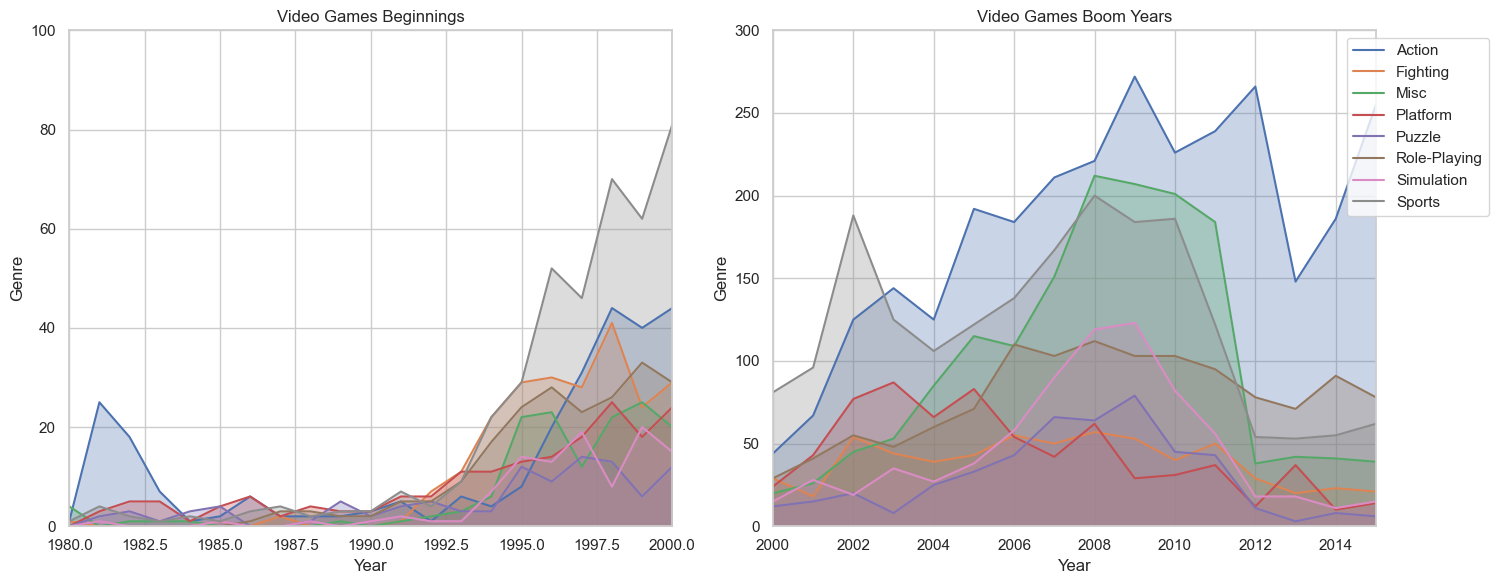

In [7]:
# Set the style of the plot as "grid" not to have it all blank
sns.set(style="whitegrid")

# Filter the DataFrame for specified genres
selected_genres = interesting_genre_list
filtered_df = df2[df2['Genre'].isin(selected_genres)]

# Group by Year and Genre, then count the number of games
grouped = filtered_df.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))  # 2 plots side by side

# Plot 1: Left subplot
axes[0].set_title('Video Games Beginnings')
for genre in grouped.columns:
    axes[0].plot(grouped.index, grouped[genre], label=genre)
    axes[0].fill_between(grouped.index, grouped[genre], alpha=0.3)

axes[0].set_xlabel("Year")
axes[0].set_ylabel("Genre")

# Set y-axis limits for the left subplot
xmin1, xmax1 = 1980, 2000 # Adjust the x-axis limits
ymin1, ymax1 = 0, 100  # Adjust the y-axis limits as needed
axes[0].set_ylim(ymin1, ymax1)

# Plot 2: Right subplot
axes[1].set_title('Video Games Boom Years')
for genre in grouped.columns:
    axes[1].plot(grouped.index, grouped[genre], label=genre)
    axes[1].fill_between(grouped.index, grouped[genre], alpha=0.3)

axes[1].set_xlabel("Year")
axes[1].set_ylabel("Genre")

# Set y-axis limits for the right subplot
xmin2, xmax2 = 2000, 2015 # Adjust the x-axis limits
ymin2, ymax2 = 0, 300  # Adjust the y-axis limits as needed
axes[1].set_ylim(ymin2, ymax2)

# Show legend on the right subplot
axes[1].legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Set the desired x-axis limits for both subplots
axes[0].set_xlim(xmin1, xmax1)
axes[1].set_xlim(xmin2, xmax2)

plt.tight_layout()
plt.show()

Let's plot the most sold genres per year during the Video Games Boom so we can compare

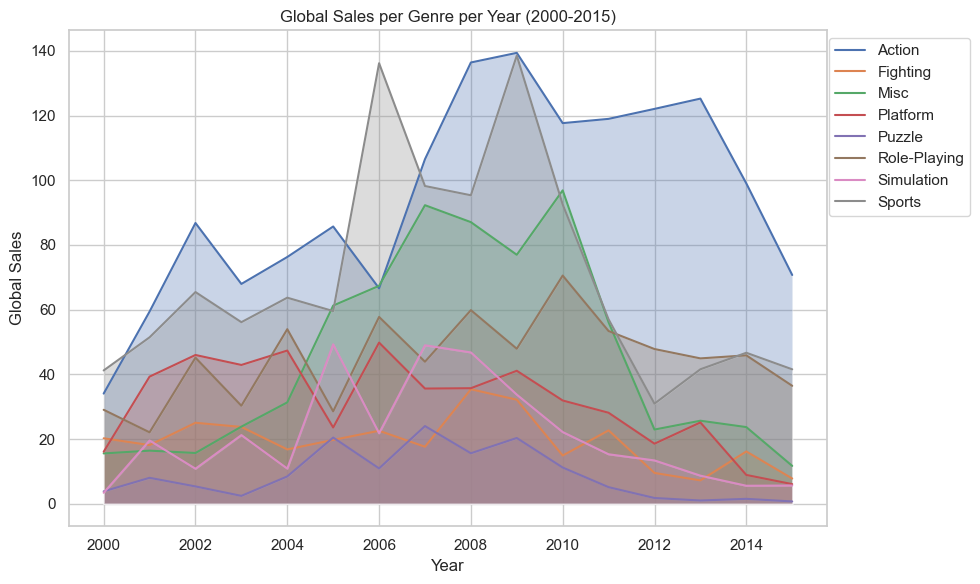

In [8]:
# Filter the DataFrame for years between 2000 and 2015
filtered_df = df2[(df2['Year'] >= 2000) & (df2['Year'] <= 2015) & df2['Genre'].isin(selected_genres)]

# Group by Year and Genre, then sum the Global_Sales for each group
grouped = filtered_df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack(fill_value=0)

# Plotting the line graph with filling and alpha
plt.figure(figsize=(10, 6))

for genre in grouped.columns:
    plt.plot(grouped.index, grouped[genre], label=genre)
    plt.fill_between(grouped.index, grouped[genre], alpha=0.3)

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.title("Global Sales per Genre per Year (2000-2015)")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()


**Comparing**

**QUESTION : Do successful games set trends or do trends make games successful ?**

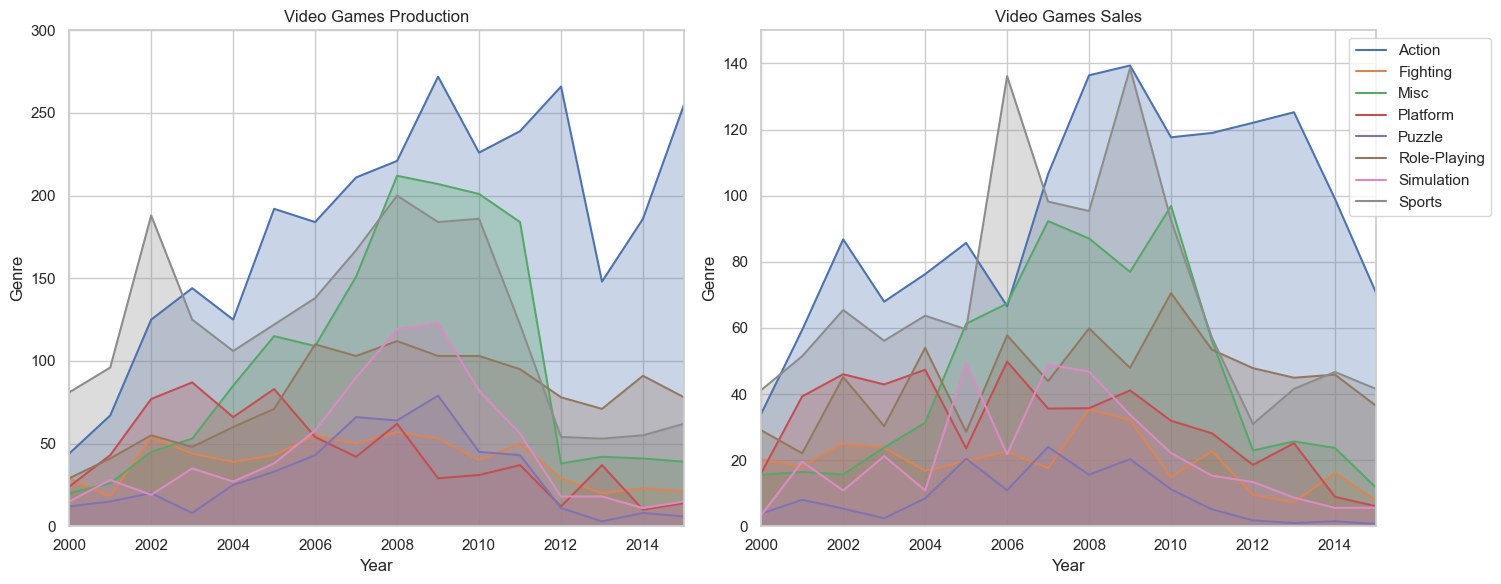

In [9]:
# Set the style of the plot as "grid" not to have it all blank
sns.set(style="whitegrid")

# Set y-axis limits for the subplots
xmin, xmax = 2000, 2015 # Adjust the x-axis limits
ymin, ymax = 0, 300  # Adjust the y-axis limits as needed
ymin2, ymax2 = 0, 150  # Adjust the y-axis limits as needed


# Filter the DataFrame for specified genres
selected_genres = interesting_genre_list
filtered_df = df2[df2['Genre'].isin(selected_genres)]

# Group by Year and Genre, then count the number of games
grouped = filtered_df.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))  # 2 plots side by side

# Plot 1: Left subplot
axes[0].set_title('Video Games Production')
for genre in grouped.columns:
    axes[0].plot(grouped.index, grouped[genre], label=genre)
    axes[0].fill_between(grouped.index, grouped[genre], alpha=0.3)

axes[0].set_xlabel("Year")
axes[0].set_ylabel("Genre")

# Set y-axis limits for the left subplot
axes[0].set_ylim(ymin, ymax)


grouped = filtered_df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack(fill_value=0)
# Plot 2: Right subplot
axes[1].set_title('Video Games Sales')
for genre in grouped.columns:
    axes[1].plot(grouped.index, grouped[genre], label=genre)
    axes[1].fill_between(grouped.index, grouped[genre], alpha=0.3)

axes[1].set_xlabel("Year")
axes[1].set_ylabel("Genre")


axes[1].set_ylim(ymin2, ymax2)

# Show legend on the right subplot
axes[1].legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Set the desired x-axis limits for both subplots
axes[0].set_xlim(xmin, xmax)
axes[1].set_xlim(xmin, xmax)

plt.tight_layout()
plt.show()

As we can see, it's the amount of sale that sets the trend of production.

For instance, focusing on sports games : There have been a big rise in sales in 2006, resulting in a rising amount of games of this genre created between 2006 and 2008.
The big downfall of the interest people had in sports game in 2010 was followed by a reduction in the new sports games on the market between 2010 and 2012.

Exploring and comparing other curves the same way shows us that the market's production reaction time is about 2 years, more or less the time needed to make a game. Thus, if a game genre becomes popular in 2010, the peek of new releases for this genre will be 2 years later.

**QUESTION : Is the company responsible for a game's success or is it about the game itself ?**

Here we'll look for a correlation between successful games and the company that made them.
We'll draw a graph plotting the games on a 2D graph, with game critic's score and global sales as X and Y axis.
Games made by big publishers between 2000 and 2015 (Nintendo, Ubisoft, Sony Computer Entertainment, Activision, EA, Sega, Microsoft, 2K, Rockstar Games) will be marked in Red, the other games marked in blue.

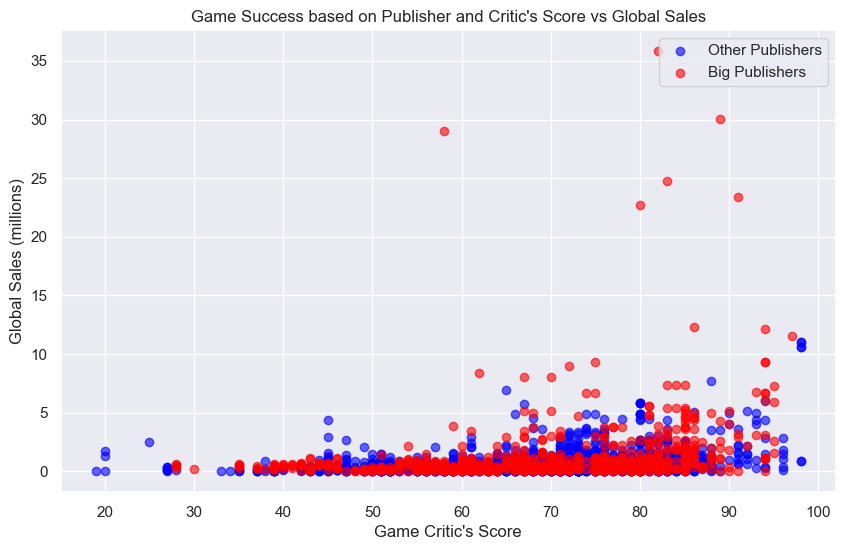

In [183]:
# Filter based on date and publishers
publishers = ['Nintendo', 'Ubisoft', 'Sony Computer Entertainment', 'Activision', 'EA', 'Sega', 'Microsoft', '2K', 'Rockstar', 'Microsoft Game Studios']
filtered_data = df[(df['Publisher'].isin(publishers)) & (df['Year'] >= 2000) & (df['Year'] <= 2015)]

# Separate data based on publisher
big_publisher_data = filtered_data[filtered_data['Publisher'].isin(publishers)]
other_publisher_data = df[~df['Publisher'].isin(publishers) & (df['Year'] >= 2000) & (df['Year'] <= 2015)]

# Plotting the graph
plt.figure(figsize=(10, 6))

plt.scatter(other_publisher_data['Metrics.Review Score'], other_publisher_data['Global_Sales'], color='blue', label='Other Publishers', alpha = 0.6)
plt.scatter(big_publisher_data['Metrics.Review Score'], big_publisher_data['Global_Sales'], color='red', label='Big Publishers', alpha = 0.6)

plt.xlabel('Game Critic\'s Score')
plt.ylabel('Global Sales (millions)')
plt.title('Game Success based on Publisher and Critic\'s Score vs Global Sales')

plt.legend()
plt.grid(True)
plt.show()


In order to have a better understanding of this plot, we'll split the blue and red dots and make a density map for each color.

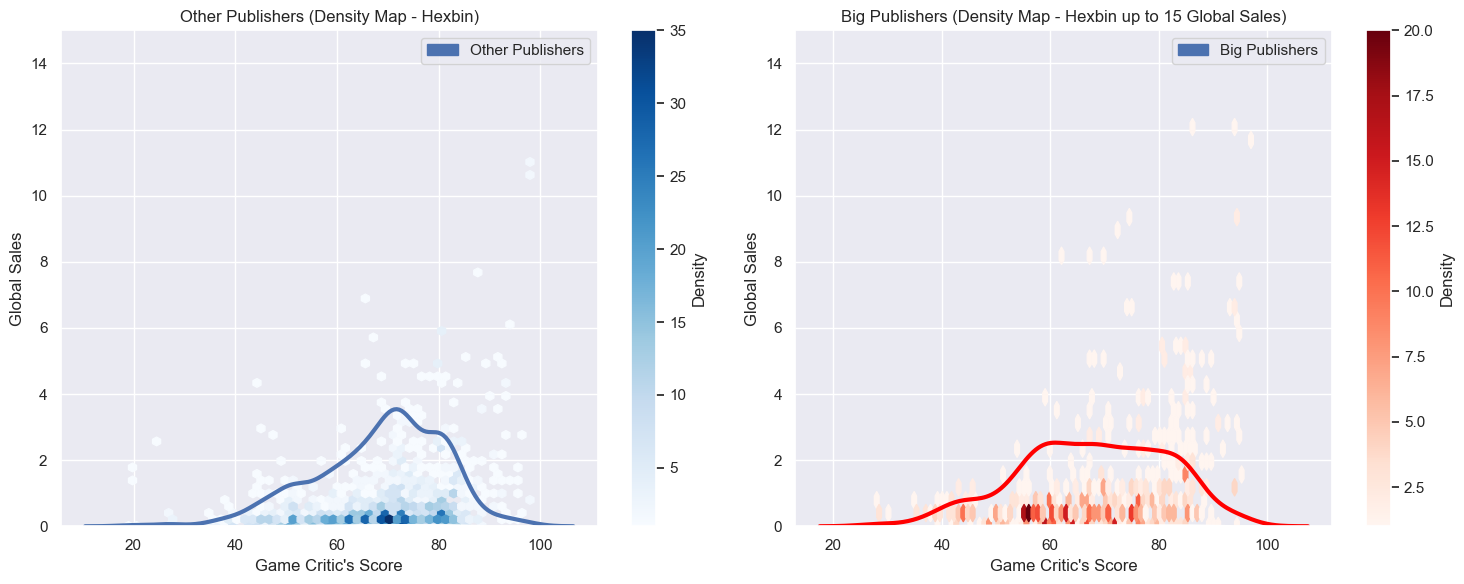

In [184]:
sns.set_style("dark")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Hexbin plot for Other Publishers
hb1 = axes[0].hexbin(other_publisher_data['Metrics.Review Score'], other_publisher_data['Global_Sales'], gridsize=50, cmap='Blues', mincnt=1)
axes[0].set_xlabel('Game Critic\'s Score')
axes[0].set_ylabel('Global Sales')
axes[0].set_title('Other Publishers (Density Map - Hexbin)')
axes[0].legend(['Other Publishers'])
axes[0].grid(True)
axes[0].set_ylim(0, 15)  # Set the maximum Y-value
fig.colorbar(hb1, ax=axes[0], label='Density')

# Calculate the scaled KDE values for Game Critic's Score - Other Publishers
kde_values_other = sns.kdeplot(other_publisher_data['Metrics.Review Score'], color='white', ax=axes[0]).get_lines()[0].get_ydata()
scaled_kde_values_other = kde_values_other * 100

# Plot the scaled KDE line for Game Critic's Score - Other Publishers
axes[0].plot(sns.kdeplot(other_publisher_data['Metrics.Review Score'], color='white', ax=axes[0]).get_lines()[0].get_xdata(), scaled_kde_values_other, label='Scaled Critic\'s Score KDE', linewidth=3)



# Hexbin plot for Big Publishers with maximum Global Sales limit of 12
hb2 = axes[1].hexbin(big_publisher_data['Metrics.Review Score'], big_publisher_data['Global_Sales'], gridsize=80, cmap='Reds', mincnt=1)
axes[1].set_xlabel('Game Critic\'s Score')
axes[1].set_ylabel('Global Sales')
axes[1].set_title('Big Publishers (Density Map - Hexbin up to 15 Global Sales)')
axes[1].legend(['Big Publishers'])
axes[1].grid(True)
axes[1].set_ylim(0, 15)  # Set the maximum Y-value
fig.colorbar(hb2, ax=axes[1], label='Density')
# Calculate the scaled KDE values for Game Critic's Score - Other Publishers
kde_values_other = sns.kdeplot(big_publisher_data['Metrics.Review Score'], color='white', ax=axes[1]).get_lines()[0].get_ydata()
scaled_kde_values_other = kde_values_other * 100

# Plot the scaled KDE line for Game Critic's Score - Other Publishers
axes[1].plot(sns.kdeplot(big_publisher_data['Metrics.Review Score'], color='white', ax=axes[1]).get_lines()[0].get_xdata(), scaled_kde_values_other, label='Scaled Critic\'s Score KDE', linewidth=3, color = 'red')




plt.tight_layout()
plt.show()




The question is deeper than "is it about the company or the game".

Obviously (or not) the most successful games (by units sold) are published by the main and gigantic publishers. But both big and small publishers can create successful games.

Looking for an answer to this question, we found out another hidden but important information : the game's critic impact on its sale depending on the size of its publisher.
For big publishers, any score over 60 won't affect the capacity of the game to be well sold, whereas for small publishers, the critique has more importance, as games with critics between 70 and 80 sell well better than games with a score of only 60.

I won't bother studying the top scores and its impact as our sample is really small. Only a few games get above 90 or 95 on critic's score, they end up being unique cases every time.
Even though, it's interesting to see that the best rated games aren't made by big publishers ! Would the small publishers tend more to try new things, and sometimes being rewarded with a good critique because they found a new innovative way of playing ?

**QUESTION : Was it easier to make a successful game back in the days or nowadays ?**

Data between 2005 and 2010 partially removed because the sample these years is way bigger than the others, yielding false results.

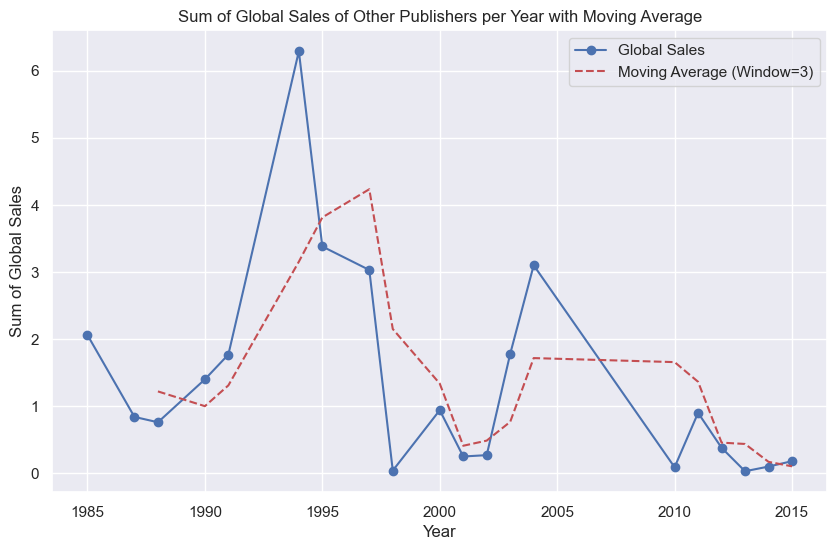

In [167]:
# Calculate the moving average of Global Sales per year with a window size of 3 (adjust window size as needed)
moving_average = sales_per_year.rolling(window=3).mean()

# Plotting the graph representing the sum of Global Sales per year for other publishers
plt.figure(figsize=(10, 6))
plt.plot(sales_per_year.index, sales_per_year.values, marker='o', linestyle='-', color='b', label='Global Sales')

# Plotting the moving average line
plt.plot(sales_per_year.index, moving_average.values, linestyle='--', color='r', label='Moving Average (Window=3)')

plt.xlabel('Year')
plt.ylabel('Sum of Global Sales')
plt.title('Sum of Global Sales of Other Publishers per Year with Moving Average')
plt.legend()
plt.grid(True)
plt.show()


Looking at the Global Moving Average of our data, we could say that before 2000 and what we called the "Video Games Boom", it was easier for small publishers to stand out as their market share was higher, comparing to 2010-2015 where it nearly reaches 0.

**For later use : list of best selling game per genre and per year**

In [236]:
# Filter the main database for specified genres and years
filtered_data = df[(df['Genre'].isin(interesting_genre_list)) & (df['Year'].between(2005, 2010))]

# Grouping by Year and Genre, summing Global Sales, and finding the best-selling game for each group
best_selling_per_year_genre = filtered_data.groupby(['Year', 'Genre', 'Title'])['Global_Sales'].sum().reset_index()
best_selling_per_year_genre = best_selling_per_year_genre.sort_values(by=['Genre', 'Year'], ascending=[True, True])

# Getting the best-selling game per year and genre
best_selling_games = best_selling_per_year_genre.groupby(['Year', 'Genre']).apply(lambda x: x.nlargest(1, 'Global_Sales')).reset_index(drop=True)
best_selling_games = best_selling_games.sort_values(by=['Genre', 'Year'], ascending=[True, True])

# Displaying the resulting DataFrame
print(best_selling_games.head(5))
print("...")


      Year   Genre                                    Title  Global_Sales
0   2005.0  Action   Grand Theft Auto: Liberty City Stories          7.72
8   2006.0  Action  LEGO Star Wars II: The Original Trilogy         22.05
16  2007.0  Action        LEGO Star Wars: The Complete Saga         63.00
24  2008.0  Action               LEGO Batman: The Videogame         45.90
32  2009.0  Action                  Tomb Raider: Underworld          0.54
...


**QUESTION : How much does timing (release date) impact a game's success in the market ? Is there an ideal time to release a game ?**

**QUESTION : Is the success of a game only decided by its genre and platform ? What other features of a game can make it successful ?**

Let's build a correlation matrix !

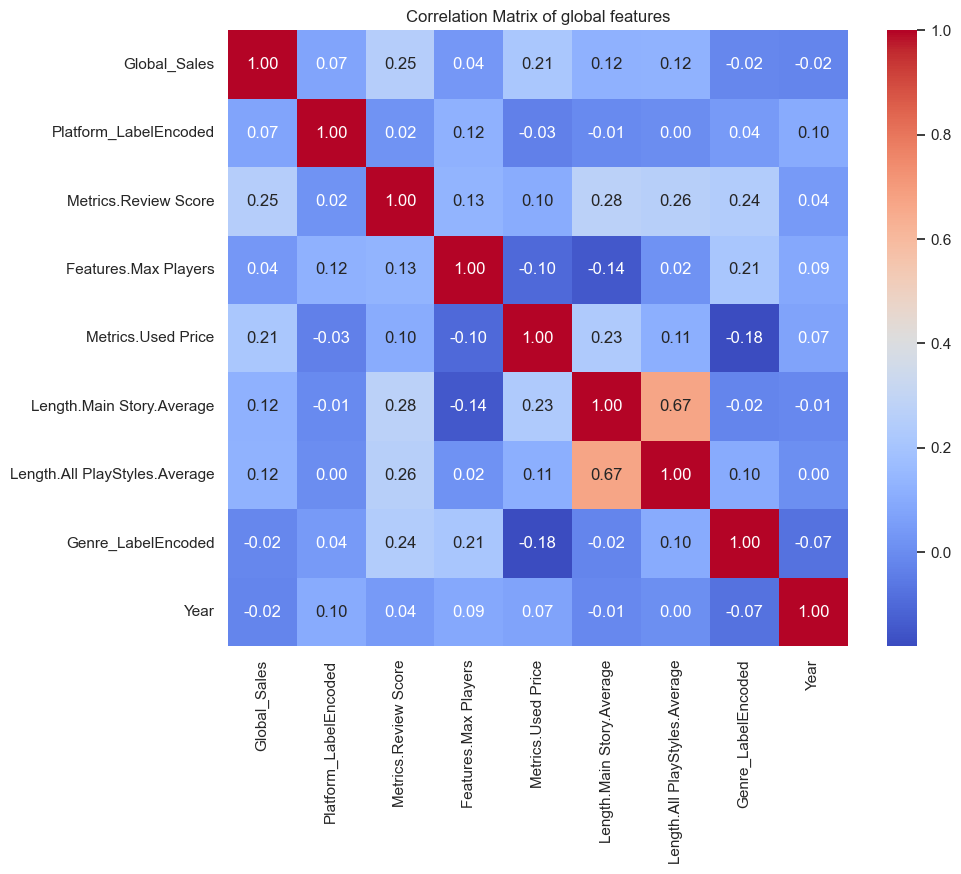

In [232]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Platform_LabelEncoded'] = label_encoder.fit_transform(df['Platform'])
df['Genre_LabelEncoded'] = label_encoder.fit_transform(df['Genre'])

# Assuming 'Global_Sales', 'Critic_Score', 'User_Score', 'Year', and other relevant numeric columns exist in your DataFrame 'df'
numeric_columns = ['Global_Sales', 'Platform_LabelEncoded','Metrics.Review Score','Features.Max Players','Metrics.Used Price','Length.Main Story.Average','Length.All PlayStyles.Average','Genre_LabelEncoded','Year']  # Add other numeric columns of interest

# Selecting only the numeric columns from the DataFrame
numeric_data = df[numeric_columns]

# Creating a correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of global features')
plt.show()

We overall get very few correlation. Considering a game is succesful when it has good critique and sells, the most correlation we have is between :

The sales and the review score.

The sales and the price.

The game review score is slightly correlated with : the main story's length, the global game length (or playtime), and the game genre.

Surprisingly, the game's genre affects the review score but not the sales !

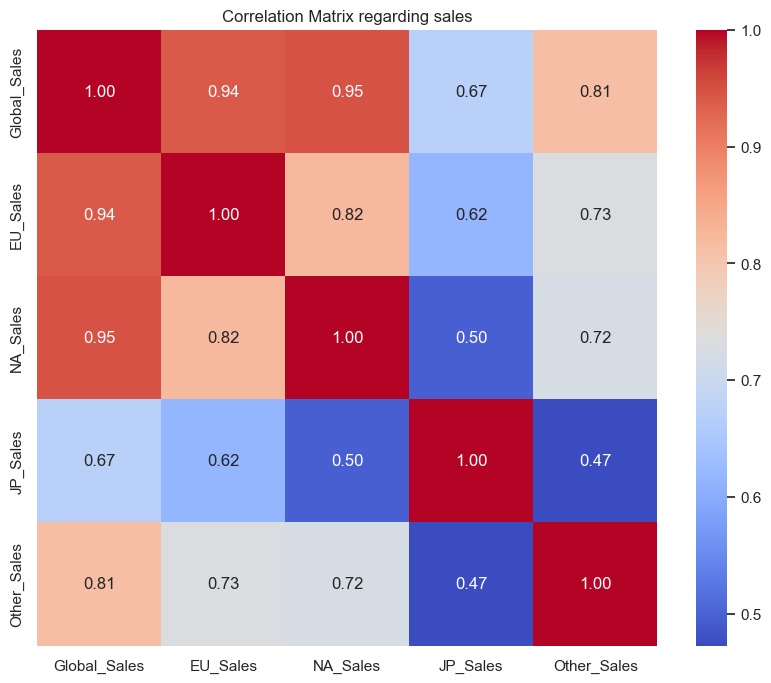

In [198]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Platform_LabelEncoded'] = label_encoder.fit_transform(df['Platform'])
df['Genre_LabelEncoded'] = label_encoder.fit_transform(df['Genre'])

# Assuming 'Global_Sales', 'Critic_Score', 'User_Score', 'Year', and other relevant numeric columns exist in your DataFrame 'df'
numeric_columns = ['Global_Sales', 'EU_Sales','NA_Sales','JP_Sales','Other_Sales']  # Add other numeric columns of interest

# Selecting only the numeric columns from the DataFrame
numeric_data = df[numeric_columns]

# Creating a correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix regarding sales')
plt.show()


Here we learn that to make a game that sells, we shall focus on doing a game that would please the North American and European regions !

As both are fairly correlated, it might be easier to focus both by focusing one of them.